In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/aniruddha7599/DAIICT-/refs/heads/main/NAFLD%20EDA.csv'
data = pd.read_csv(url)

In [12]:
# Display basic info
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
        Age  Height (cm)  Weight (kg)  Body Mass Index  \
0  1.287682    -1.492160    -0.448911         0.763847   
1  0.817640    -1.088605    -0.944812        -0.211064   
2  0.629623     0.525618     1.038792         0.639434   
3 -1.250545     1.030063     0.613734        -0.162115   
4 -2.190629    -0.281493    -1.299027        -1.204332   

   Waist Circumference (cm)  Hip Circumference (cm)  \
0                  0.969543               -0.026145   
1                 -0.844825               -0.618139   
2                  0.667148                0.763179   
3                  0.465552                0.960510   
4                 -0.844825               -0.716804   

   Gender (Female=0, Male=1)  Diabetes (No=0, Yes=1)  \
0                          0                       0   
1                          0                       0   
2                          1                       1   
3                          1                       1   
4          

In [13]:
# Define the features and target
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
# Create and train the SVM model with a standard kernel (e.g., RBF)
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [18]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7197802197802198
Precision: 0.7267080745341615
Recall: 0.9435483870967742
F1 Score: 0.8210526315789474
Confusion Matrix:
 [[ 14  44]
 [  7 117]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.24      0.35        58
           1       0.73      0.94      0.82       124

    accuracy                           0.72       182
   macro avg       0.70      0.59      0.59       182
weighted avg       0.71      0.72      0.67       182



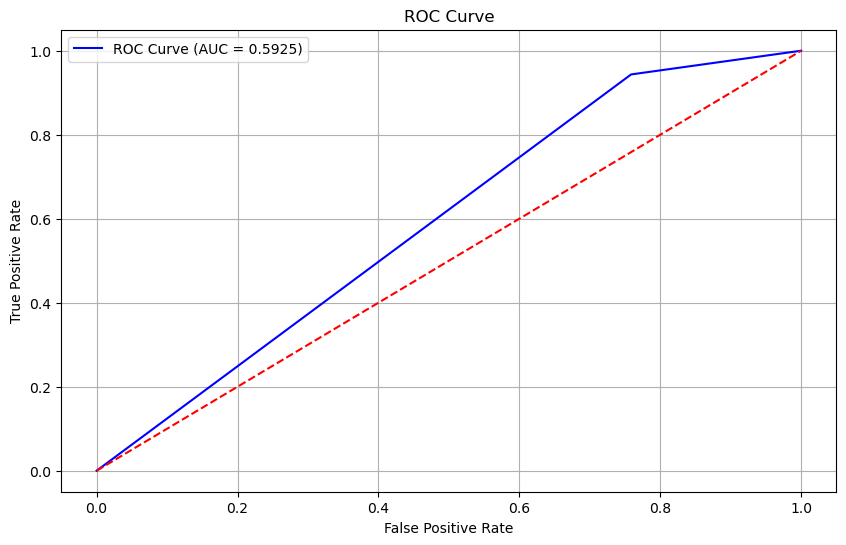

In [19]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

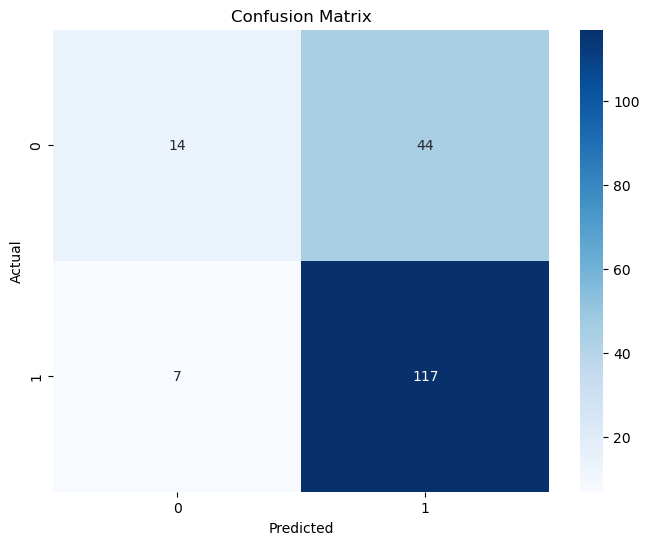

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
